Importing Data and Libraries

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

In [2]:
#Disabling deprecation warnings

warnings.filterwarnings("ignore")

In [3]:
#Styling option

plt.style.use('fivethirtyeight')

In [4]:
#Setting path

path = r"C:\Users\luiss\OneDrive\Career Foundry\Achievement 6 - Life Expectancy"

In [5]:
#Importing data

data = pd.read_csv(os.path.join(path, 'Data', 'covid_by_state.csv'))

Data Wrangling

In [6]:
#Checking data

data.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [7]:
data.shape

(18384, 5)

In [8]:
#Creating new column of total deaths by date

data['Total_Deaths'] = data.groupby('date')['deaths'].transform(sum)

In [9]:
data.head()

,date,state,fips,cases,deaths,Total_Deaths
0,2020-01-21,Washington,53,1,0,0
1,2020-01-22,Washington,53,1,0,0
2,2020-01-23,Washington,53,1,0,0
3,2020-01-24,Illinois,17,1,0,0
4,2020-01-24,Washington,53,1,0,0


In [10]:
data.describe()

,fips,cases,deaths,Total_Deaths
count,18384.000000,1.838400e+04,18384.000000,18384.000000
mean,31.915742,1.322358e+05,3165.143005,174082.189077
std,18.642755,2.574721e+05,5822.014120,111283.868496
min,1.000000,1.000000e+00,0.000000,0.000000
25%,17.000000,5.096750e+03,110.000000,98190.000000
50%,31.000000,3.793550e+04,840.000000,169914.000000
75%,46.000000,1.454778e+05,3566.000000,238048.000000
max,78.000000,3.309463e+06,42996.000000,439421.000000


In [11]:
#Creating subset of data, wanting date and total deaths

dsub = data[['date', 'Total_Deaths']]

In [12]:
dsub.head()

,date,Total_Deaths
0,2020-01-21,0
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,0
4,2020-01-24,0


In [13]:
dsub['date'].value_counts(dropna = False)

date
2020-07-27    55
2020-09-25    55
2020-10-04    55
2020-10-03    55
2020-10-02    55
              ..
2020-01-25     3
2020-01-24     2
2020-01-23     1
2020-01-22     1
2020-01-21     1
Name: count, Length: 376, dtype: int64

In [14]:
#Dropping duplicates

dsub = dsub.drop_duplicates()

In [15]:
dsub['date'].value_counts(dropna = False)

date
2020-01-21    1
2020-09-24    1
2020-10-03    1
2020-10-02    1
2020-10-01    1
             ..
2020-05-23    1
2020-05-22    1
2020-05-21    1
2020-05-20    1
2021-01-30    1
Name: count, Length: 376, dtype: int64

In [16]:
#Setting date as index

from datetime import datetime

#Creating datetime column from date
dsub['date'] = pd.to_datetime(dsub['date'])

#Setting date as index
dsub.set_index('date', inplace=True)

dsub.head()

,Total_Deaths
date,
2020-01-21,0
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0


Time Series Analysis

Create Line Chart of Data

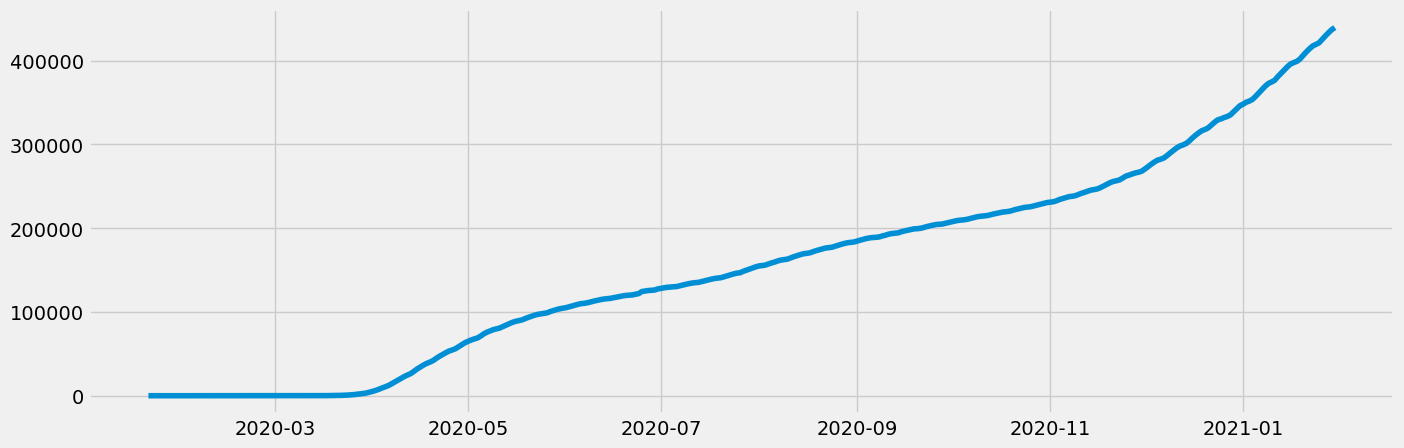

In [17]:
#Plotting data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(dsub)

Decomposing Data's Components

In [18]:
#Decomposing data using additive model since data is linear-ish

decomposition = sm.tsa.seasonal_decompose(dsub, model='additive')

In [19]:
#Defining fixed size for all special charts
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

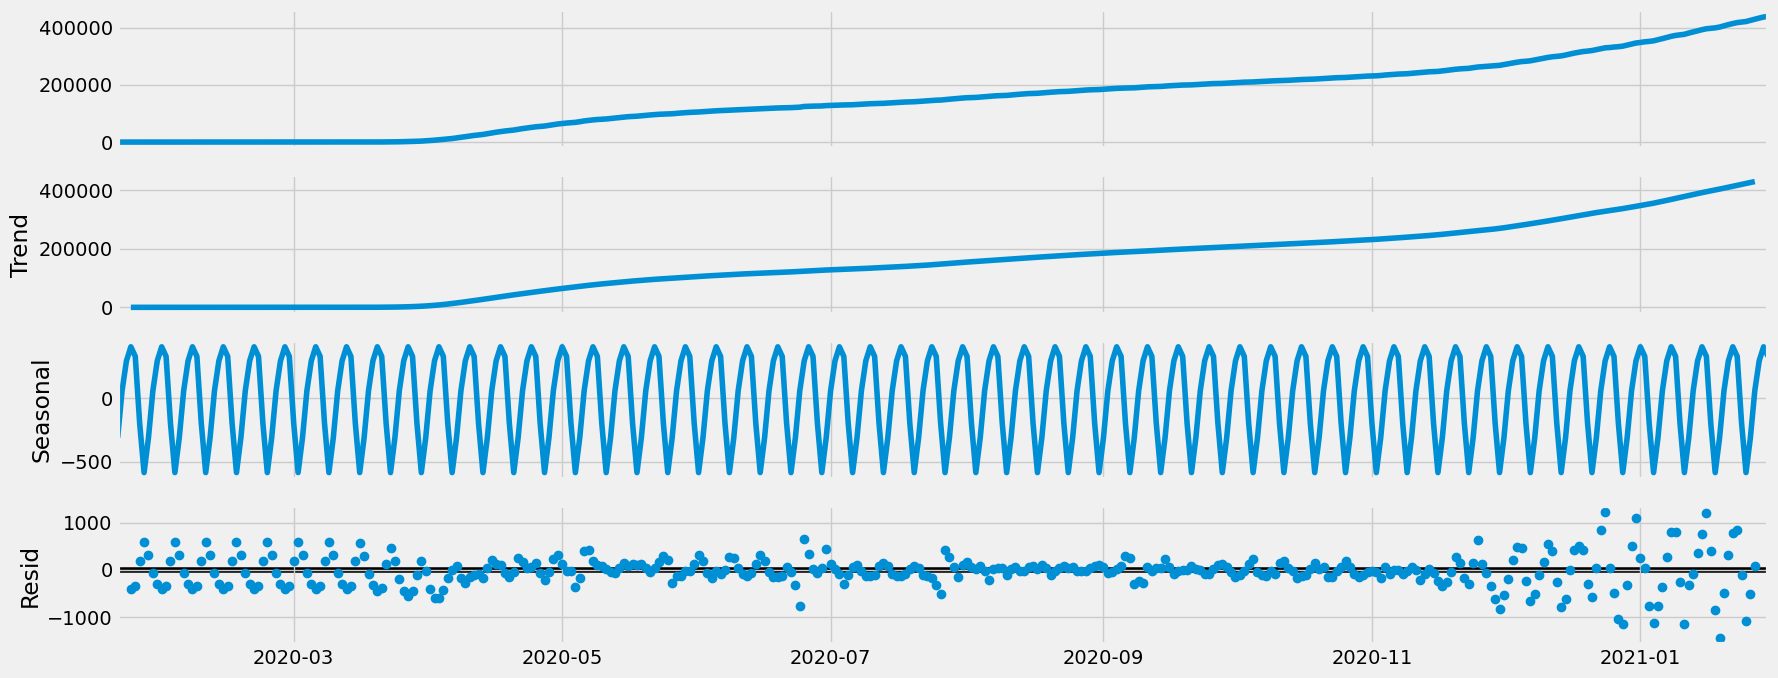

In [20]:
#Plotting the separate components
decomposition.plot()
plt.show()

From these results I can make see that there is a general upward trend with no seasonality.  A problem with this data set is that it only contains a single year, so I can't see if the numbers would be the same in the same months the following year.  On top of that, this was when the pandemic first hit, so virulent strains were more common and hadn't died out yet by killing their hosts in comparison to less lethal strains which are more prevalent now. As far as noise goes, there's some noise from Jan 2020 until April 2020, minimal noise from April 2020 until mid-November 2020, and then a fair amount of noise from mid-November 2020 until the end of the data set, Jan 2021.

Dickey-Fuller for stationarity

In [22]:
#Importing adfuller() function
from statsmodels.tsa.stattools import adfuller

#Defining function
def dickey_fuller(timeseries):
    print('Dickey_Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key,value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)

#Apply the test using function on time series
dickey_fuller(dsub['Total_Deaths'])

Dickey_Fuller Stationarity test:
Test Statistic                   1.138720
p-value                          0.995534
Number of Lags Used             15.000000
Number of Observations Used    360.000000
Critical Value (1%)             -3.448646
Critical Value (5%)             -2.869602
Critical Value (10%)            -2.571065
dtype: float64


Since the test statistic is larger than the critical values, that means I haven't disproved the null hypothesis, which is that my data contains a unit root.  Since I haven't disproven that my data contains a unit root, that means it's not stationary.

Stationarizing Data Using Differencing

In [47]:
#Differencing to stationarize
d_diff = dsub - dsub.shift(1)

In [48]:
#Removing missing values results from differencing
d_diff.dropna(inplace = True)

In [49]:
d_diff.head()

,Total_Deaths
date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0


In [50]:
d_diff.columns

Index(['Total_Deaths'], dtype='object')

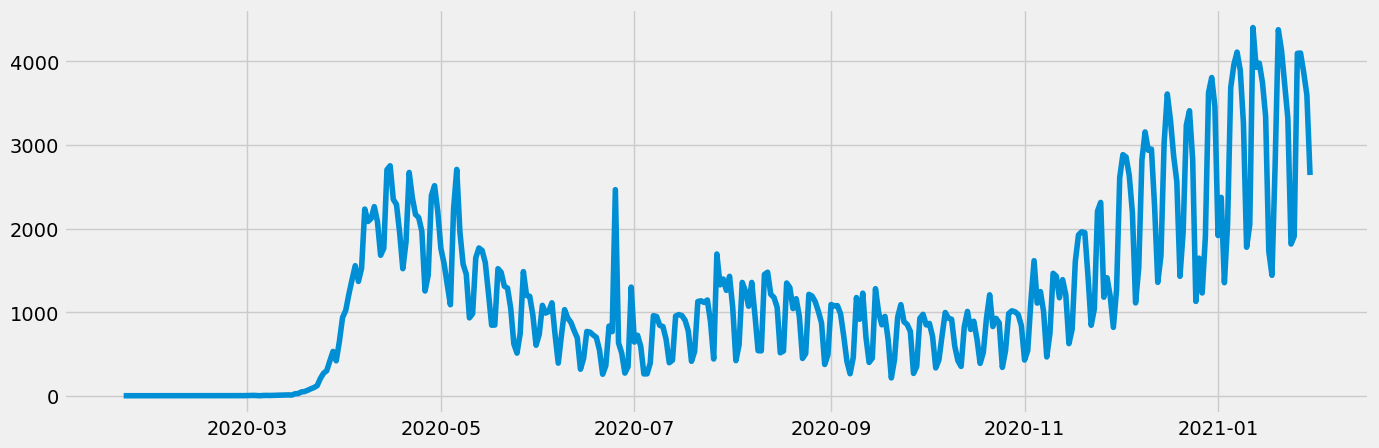

In [51]:
#Seeing result of differencing

plt.figure(figsize=(15,5), dpi=100)
plt.plot(d_diff)

In [52]:
#Performing dickey-fuller on new data
dickey_fuller(d_diff)

Dickey_Fuller Stationarity test:
Test Statistic                  -1.223502
p-value                          0.663405
Number of Lags Used             14.000000
Number of Observations Used    360.000000
Critical Value (1%)             -3.448646
Critical Value (5%)             -2.869602
Critical Value (10%)            -2.571065
dtype: float64


In [53]:
#Dickey-fuller test improved, null hypothesis still not disproved
#Differencing again
dd2 = d_diff - d_diff.shift(1)

In [56]:
#Removing duplicates
dd2.dropna(inplace = True)

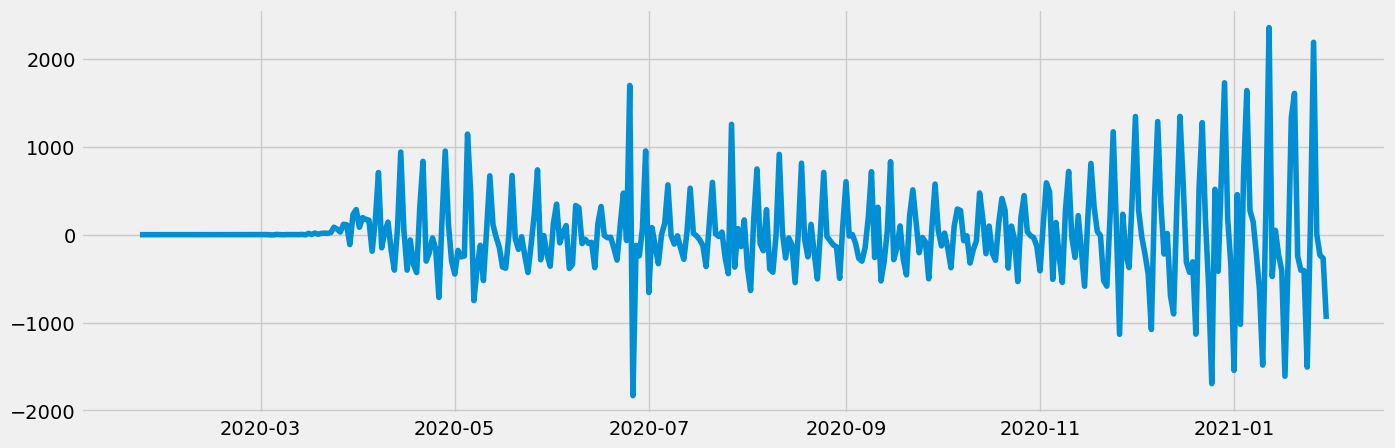

In [58]:
#{Plotting dd2

plt.figure(figsize=(15,5), dpi=100)
plt.plot(dd2)

In [59]:
#performing dickey-fuller on new set
dickey_fuller(dd2)

Dickey_Fuller Stationarity test:
Test Statistic                  -4.722903
p-value                          0.000076
Number of Lags Used             13.000000
Number of Observations Used    360.000000
Critical Value (1%)             -3.448646
Critical Value (5%)             -2.869602
Critical Value (10%)            -2.571065
dtype: float64


After 2 rounds of differencing I have disproven the null hypothesis, data contains no unit root and is considered stationary

Autocorrelations

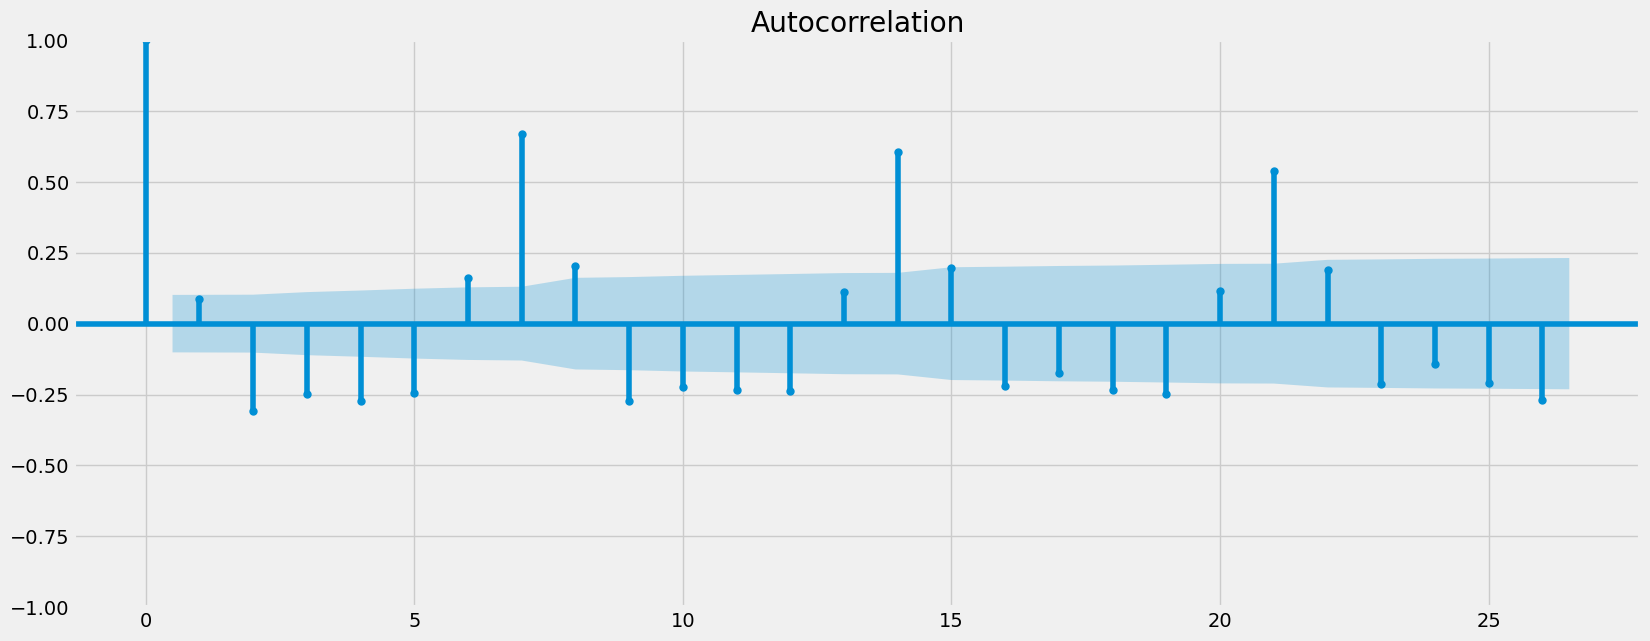

In [61]:
#performing autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(dd2)
plt.show()

While my dickey-fuller test shows a p-value of <0.05 and my test statistic is less than my critical value of 1%, the autocorrelation I performed shows that my stationarity is weak.  Although about half of the points that are outside of the confidence interval are very close, I'm not sure if I should take that into account.